In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import ipywidgets
import numpy as np
%matplotlib inline

In [5]:
os.chdir(r"D:\Utkarsh\UTKARSH\ML\Projects\Hospital_Admissions")
os.getcwd()

'D:\\Utkarsh\\UTKARSH\\ML\\Projects\\Hospital_Admissions'

In [6]:
#loading the training dataset
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,Date,Hospital_ID,Department,Temperature,Precipitation,Air_Quality_Index,Flu_Activity,Public_Holiday,Weekend,Special_Events,Staffing_Level,Admissions
0,2018-01-01,H001,Emergency,32.5,0.1,88,Low,1,0,0,77.0,63
1,2018-01-01,H001,Surgery,32.5,0.1,88,High,1,0,0,69.7,23
2,2018-01-01,H001,Pediatrics,32.5,0.1,88,Low,1,0,0,69.1,12
3,2018-01-01,H001,Internal Medicine,32.5,0.1,88,High,1,0,0,63.4,23
4,2018-01-01,H001,Obstetrics,32.5,0.1,88,High,1,0,0,69.9,11


In [7]:
train_report = ProfileReport(df_train, title="Training data profile report")

In [8]:
train_report

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


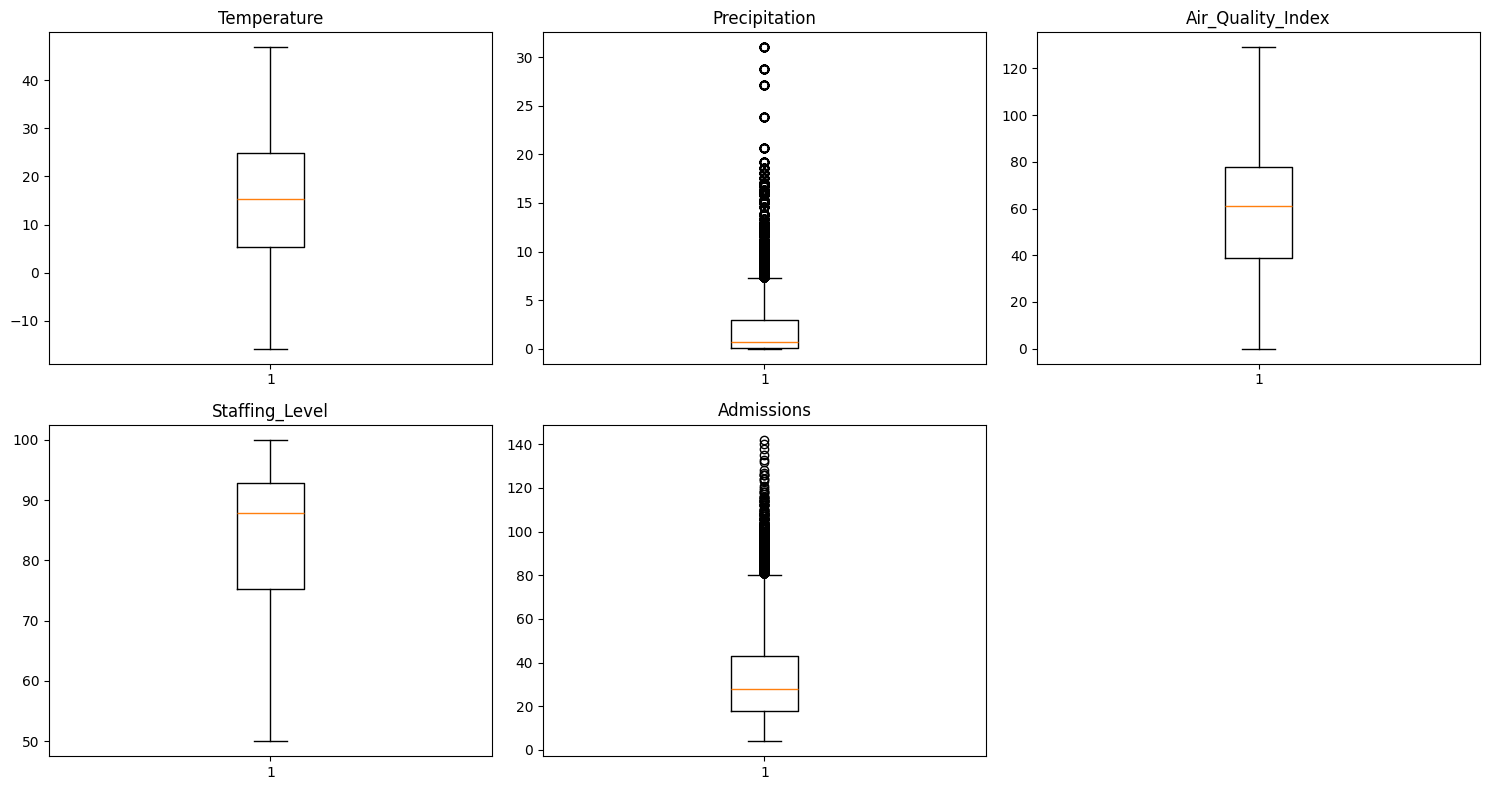

In [9]:
import math
num_cols = df_train.select_dtypes(include=np.number).columns
num_cols = [
    col for col in num_cols
    if df_train[col].dropna().nunique() > 2
]

n_rows = math.ceil(len(num_cols)/3)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_train[col].dropna())
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### As evident with the boxplots of numeric columns, temperature, air quality index and staffing level are fairly distributed with less extremes. Precipitation and admissions are higly rght skewed with large number of upper outliers, 

In [10]:
admissions_dept = df_train.groupby('Department')['Admissions'].agg(['mean', 'median', 'count'])
admissions_dept

,mean,median,count
Department,,,
Emergency,63.436145,62.0,9130
Internal Medicine,35.277218,35.0,9130
Obstetrics,16.410624,16.0,9130
Pediatrics,22.788828,22.0,9130
Surgery,26.348740,28.0,9130


<Figure size 1000x400 with 0 Axes>

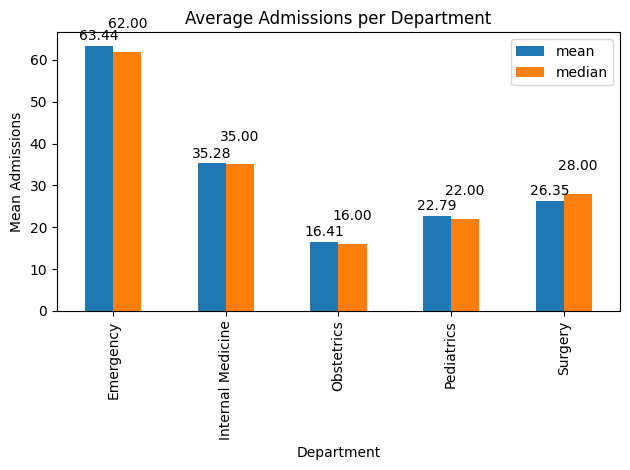

In [11]:
plt.figure(figsize=(10,4))
ax = admissions_dept[['mean', 'median']].plot(kind='bar')

ax.bar_label(ax.containers[0], padding=2, fmt="%.2f")
ax.bar_label(ax.containers[1], padding=15, fmt="%.2f")

plt.ylabel("Mean Admissions")
plt.title("Average Admissions per Department")
plt.tight_layout()
plt.show()


In [12]:
from scipy.stats import f_oneway

deptadmissions = df_train.groupby('Department')['Admissions'].apply(list)

Anovaresults = f_oneway(*deptadmissions)
print(f"p-value: ", Anovaresults[1])

p-value:  0.0


In [13]:
hospital_admissions = df_train.groupby(['Hospital_ID', 'Department'])['Admissions'].count()
hospital_admissions

Hospital_ID  Department       
H001         Emergency            1826
             Internal Medicine    1826
             Obstetrics           1826
             Pediatrics           1826
             Surgery              1826
H002         Emergency            1826
             Internal Medicine    1826
             Obstetrics           1826
             Pediatrics           1826
             Surgery              1826
H003         Emergency            1826
             Internal Medicine    1826
             Obstetrics           1826
             Pediatrics           1826
             Surgery              1826
H004         Emergency            1826
             Internal Medicine    1826
             Obstetrics           1826
             Pediatrics           1826
             Surgery              1826
H005         Emergency            1826
             Internal Medicine    1826
             Obstetrics           1826
             Pediatrics           1826
             Surgery             